In [3]:
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
Image(url='http://datascience.uci.edu/wp-content/uploads/sites/2/2014/09/data_science_logo_with_image1.png')
%matplotlib inline

## Predictive Modeling with Python - _Linear Regression_
#### Author: Brian Vegetabile

### Goals of this Lesson
 
- Present the fundamentals of Linear Regression for Prediction
    - Notation and Framework
    - Gradient Descent for Linear Regression
    - Closed form Matrix Solutions for Linear Regression
- Demonstrate Python 
    - Code Stochastic Gradient Descent
        - Loops in Python
    - Code Closed Form Matrix Solution
        - Linear Algebra in Python
    - Perform Linear Regression in Sci-Kit Learn
        - Specialized packages in python


### References for Linear Regression

- Elements of Statistical Learning - Chapter 3 by Hastie, Tibshriani, Friedman
- Alex Ihler's Course Notes on Linear Models for Regression - http://sli.ics.uci.edu/Classes/2015W-273a
- scikit-learn Documentation - http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

### Linear Regression Notation and Framework

Linear Regression supervised learning technique that is interested in predicting a response or target $y$, based on a linear combination of a set $p$ predictors or features, $x= (1, x_1,\dots, x_p)$ such that,

\begin{equation*}
y = \beta_0 + \beta_1 x_1 + \dots + \beta_p x_p = x_i^T\beta
\end{equation*}

_**Data We Observe**_

\begin{eqnarray*}
y &:& \mbox{response or target variable} \\
x &:& \mbox{set of $p$ predictor or explanatory variables } x = (1, x_1, \dots, x_p) 
\end{eqnarray*}

_** What We Are Trying to Learn**_

\begin{eqnarray*}
\beta = (\beta_0, \dots, \beta_p) : \mbox{Parameters values to for a best prediction of }y \rightarrow \hat y
\end{eqnarray*}

_**Outcomes We are Trying to Predict**_

\begin{eqnarray*}
\hat y : \mbox{Prediction for the data that we observe}
\end{eqnarray*}

_**Matrix Notation**_

\begin{equation*}
Y = \left( \begin{array}{ccc}
y_1 \\
y_2 \\
\vdots \\
y_i \\
\vdots \\
y_N
\end{array} \right)
\qquad
X = \left( \begin{array}{ccc}
1 & x_{1,1} & x_{1,2} & \dots & x_{1,p} \\
1 & x_{2,1} & x_{2,2} & \dots & x_{2,p} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{i,1} & x_{i,2} & \dots & x_{i,p} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{N,1} & x_{N,2} & \dots & x_{N,p} \\
\end{array} \right)
\qquad
\beta = \left( \begin{array}{ccc}
\beta_0 \\
\beta_1 \\
\vdots \\
\beta_j \\
\vdots \\
\beta_p
\end{array} \right)
\end{equation*}
_** How can we Learn $\beta$? **_

Linear Regression can be thought of as an optimization problem where we want to minimize some loss function of the error between the prediction $\hat y$ and the observed data $y$.  

\begin{eqnarray*}
    error_i &=& y_i - \hat y_i \\
    &=& y_i - x_i^T\beta
\end{eqnarray*}


_Let's see what these errors look like..._

Below we show a simulation where the observed $y$ was generated such that $y= 1 + 0.5 x + \epsilon$ and $\epsilon \sim N(0,1)$.  If we assume that know the truth that $\hat y=1 + 0.5 x$, the red lines demonstrate the error (or residuals) between the observed and the truth.  

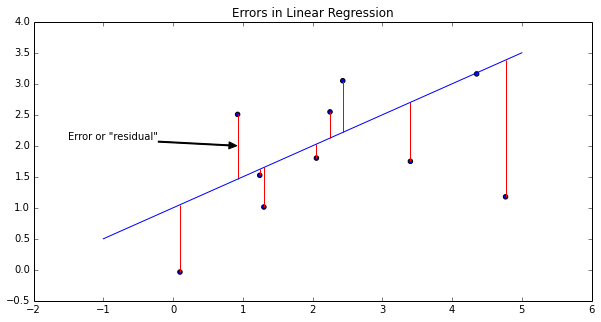

In [4]:
np.random.seed(33)     # Setting a seed allows reproducability of experiments

beta0 = 1              # Creating an intercept
beta1 = 0.5            # Creating a slope

# Randomly sampling data points
x = np.random.uniform(0,5,10)
y = beta0 + beta1 * x + np.random.normal(0,1,10)
line1 = beta0 + beta1 * np.arange(-1, 6)

f = plt.figure()
plt.scatter(x,y)                   # Plotting observed data
plt.plot(np.arange(-1,6), line1)   # Plotting the true line
for i, xi in enumerate(x):
    plt.vlines(xi, beta0 + beta1 * xi, y[i], colors='red') # Plotting Residual Lines
plt.annotate('Error or "residual"', xy = (x[5], 2), xytext = (-1.5,2.1),
             arrowprops=dict(width=1,headwidth=7,facecolor='black', shrink=0.01))
f.set_size_inches(10,5)
plt.title('Errors in Linear Regression')
plt.show()

_Choosing a Loss Function to Optimize_

Historically Linear Regression has been solved using the method of Least Squares where we are interested in minimizing the mean squared error loss function of the form:

\begin{eqnarray*}
    Loss(\beta) = MSE &=& \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat y_i)^2 \\
    &=& \frac{1}{N} \sum_{i=1}^{N} (y_i - x_i^T\beta)^2 \\
\end{eqnarray*}

Where $N$ is the total number of observations.  Other loss functions can be used, but using mean squared error (also referred to sum of the squared residuals in other text) has very nice properities for closed form solutions.  We will use this loss function for both gradient descent and to create a closed form matrix solution.

### Before We Present Solutions for Linear Regression: Introducing the Old Faithful Dataset

We'll use this dataset to investigate Linear Regression.  The dataset consists of 272 observations of the Old Faithful geyser of the waiting time between eruptions and the duration of the eruption.  The two variables included are the eruption time in minutes, and the waiting time in minutes.

**Filename**

- 'oldfaithful.csv'.

**Variables**
- $eruptions$
- $waiting$

** What we will try to predict **

We will attempt to predict the duration of an eruption based upon the time we have waited at Old Faithful


#### Load The Data

Loading data in python from csv files in python can be done by a few different ways.  The numpy package has a function called 'genfromtxt' that can read csv files, while the pandas library has the 'read_csv' function.  Remember that we have imported numpy and pandas as $np$ and $pd$ respectively at the top of this notebook.  An example using pandas is as follows:

    pd.read_csv(filename, **args)

http://pandas.pydata.org/pandas-docs/dev/generated/pandas.io.parsers.read_csv.html

_**Student Action - Load the 'oldfaithful.csv' file into a variable_

In [5]:
oldfaithful = pd.read_csv('oldfaithful.csv', skipinitialspace=True)

#### Data Exploration - Investigate the Variables

_**Student Action_

Create three plots - A histogram of the variable $eruptions$, A histogram of the variable $waiting$, A scatterplot 

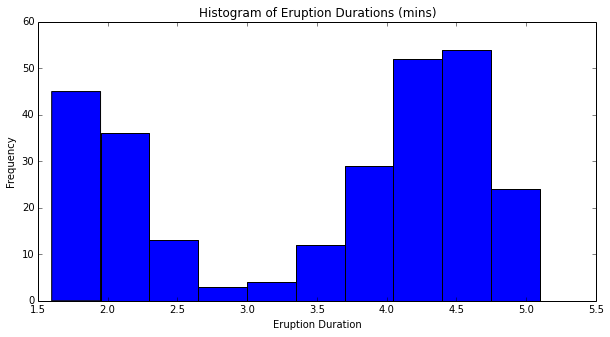

In [6]:
f = plt.figure()
plt.hist(oldfaithful['eruptions'])
plt.xlabel('Eruption Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Eruption Durations (mins)')
f.set_size_inches(10, 5)
plt.show()

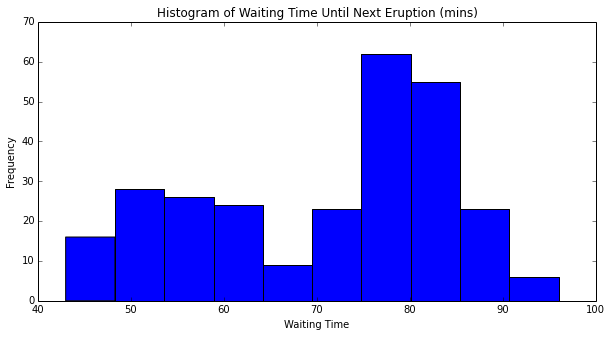

In [7]:
f = plt.figure()
plt.hist(oldfaithful['waiting'])
plt.xlabel('Waiting Time')
plt.ylabel('Frequency')
plt.title('Histogram of Waiting Time Until Next Eruption (mins)')
f.set_size_inches(10, 5)
plt.show()

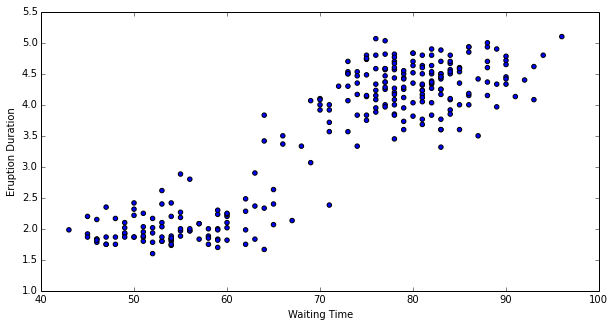

In [8]:
f = plt.figure()
plt.scatter(oldfaithful['waiting'], oldfaithful['eruptions'])
plt.xlabel('Waiting Time')
plt.ylabel('Eruption Duration')
f.set_size_inches(10, 5)
plt.show()

## Gradient Descent for Linear Regression

In Linear Regression we are interested in optimizing our loss function $Loss(\beta)$ to find the optimatal $\beta$ such that 

\begin{eqnarray*}
\hat \beta &=& \arg \min_{\beta} \frac{1}{N} \sum_{i=1}^{N} (y_i - x_i^T\beta)^2 \\
&=& \arg \min_{\beta} \frac{1}{N} (Y - X\beta)^T (Y - X\beta) \\
\end{eqnarray*}

One optimization technique called 'Gradient Descent' is useful for finding an optimal solution to this problem.  Gradient descent is a first order optimization technique that attempts to find a local minimum of a function by updating its position by taking steps proportional to the negative gradient of the function at its current point.  The gradient at the point indicates the direction of steepest ascent and is the best guess for which direction the algorithm should go.  

If we consider $\theta$ to be some parameters we are interested in optimizing, $L(\theta)$ to be our loss function, and $\alpha$ to be our step size proportionality, then we have the following algorithm:

_________

_**Algorithm - Gradient Descent**_

- Initialize $\theta$
- Until $\alpha || \nabla L(\theta) || < tol $:
    - $\theta^{(t+1)} = \theta^{(t)} - \alpha \nabla_{\theta} L(\theta^{(t)})$
__________

For our problem at hand, we therefore need to find $\nabla L(\beta)$, thus the deriviative of $L(\beta)$ due to the $j^{th}$ feature is:

\begin{eqnarray*}
    \frac{\partial L(\beta)}{\partial \beta_j} = -\frac{2}{N}\sum_{i=1}^{N} (y_i - x_i^T\beta)*{x_{i,j}}
\end{eqnarray*}

In matrix notation this can be written:

\begin{eqnarray*}
Loss(\beta) &=& \frac{1}{N}(Y - X\beta)^T (Y - X\beta) \\
&=& \frac{1}{N}(Y^TY - 2 \beta^T X^T Y + \beta^T X^T X\beta) \\
\nabla_{\beta} L(\beta) &=& \frac{1}{N} (-2 X^T Y + 2 X^T X \beta) \\
&=& -\frac{2}{N} X^T (Y - X \beta) \\
\end{eqnarray*}



_** Student Action - Perform Gradient Descent on the Oldfaithful Dataset_

Remember, our response is $eruptions$ duration and our predictor is $waiting$ time

_Hints:_

- Pandas hints
    - To create a matrix in Pandas, use the DataFrame method.  
            - matrix = pd.DataFrame({'var1': data1,
                                     'var2': data2})
    - Accessing the columns of a Pandas DataFrame can be done using the columns method 
        - Returning the name of the $i^{th}$ column
                - matrix.columns[i] 
        - Returning the values of the $i^{th}$ column
                - matrix[matrix.columns[i]]

- Numpy hints
    - Matrix multiplication:
            - np.dot(X,Y)

    - Summing a column:
            - np.sum(Y)

In [47]:
# Setting a Random Seed for Reproducibility 
np.random.seed(2015)

# Setting up our matrices 
Y = oldfaithful['eruptions']
N = len(Y)
X = pd.DataFrame({'ones' : np.ones(N), 
                  'waiting' : oldfaithful['waiting']})
p = len(X.columns)

# Initializing the beta vector
betas = np.array([-1.85, 0.7])

# Initializing Alpha
alph = 0.0001

# Setting a tolerance 
tol = 1e-8

err = Y - np.dot(X, betas)
grad = -2*np.dot(X.transpose(),err)/N
niter = 1.
while (alph*np.linalg.norm(grad) > tol) & (niter < 500000):
    err = Y - np.dot(X, betas)
    grad = -2*np.dot(X.transpose(),err)/N
    betas = betas - alph*grad
    niter += 1
print niter, betas

338893.0 [-1.87260107  0.0756087 ]


## Linear Regression Matrix Solution

From the last section, you may have recognized that we could actually solve for $\beta$ directly.  

\begin{eqnarray*}
Loss(\beta) &=& \frac{1}{N}(Y - X\beta)^T (Y - X\beta) \\
\nabla_{\beta} L(\beta) &=& \frac{1}{N} (-2 X^T Y + 2 X^T X \beta) \\
\end{eqnarray*}

Setting to zero

\begin{eqnarray*}
0 &=& -2 X^T Y + 2 X^T X \beta \\
X^T X \beta  &=& X^T Y \\
\end{eqnarray*}

If we assume that the columns $X$ are linearly independent then

\begin{eqnarray*}
 \hat \beta  &=& (X^T X)^{-1}X^T Y \\
\end{eqnarray*}

This is called the _Ordinary Least Squares_ (OLS) Estimator 

_** Student Action - Solve for $\hat \beta$ using  on the Oldfaithful Dataset_

In [10]:
# Setting up our matrices 
Y = oldfaithful['eruptions']
N = len(Y)
X = pd.DataFrame({'ones' : np.ones(N), 
                  'waiting' : oldfaithful['waiting']})

XtX = np.dot(X.transpose(), X)
invXtX = np.linalg.inv(XtX)
XtY = np.dot(X.transpose(), Y)

betahat = np.dot(invXtX, XtY)
print betahat

[-1.87401599  0.07562795]


## Sci-Kit Learn Linear Regression

Here is the documentation for the sci-kit learn implementation of Ordinary Least Squares from their linear models package

_Generalized Linear Models Documentation:_ 
http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

_LinearRegression Class Documentation:_  
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

From this we that we'll need to import the module `linear_model` using the following:

    from sklearn import linear_model
    
Let's examine an example using the `LinearRegression` class from scikit-learn.  We'll continue with the simulated data from the beginning of the exercise.

### _Example using the variables from the Residual Example_

** Notes ** 

- Calling `linear_model.LinearRegression()` creates an object of class  `sklearn.linear_model.base.LinearRegression`
    - Defaults 
        - `fit_intercept = True`: automatically adds a column vector of ones for an intercept
        - `normalize = False`: defaults to not normalizing the input predictors
        - `copy_X = False`: defaults to not copying X
        - `n_jobs = 1`: The number of jobs to use for the computation. If -1 all CPUs are used. This will only provide speedup for n_targets > 1 and sufficient large problems.
    - Example
        - `lmr = linear_model.LinearRegression()
- To fit a model, the method `.fit(X,y)` can be used
    - X must be a column vector for scikit-learn
        - This can be accomplished by creating a DataFrame using `pd.DataFrame()`
    - Example
        - lmr.fit(X,y)
- To predict out of sample values, the method `.predict(X)` can be used
- To see the $\beta$ estimates use `.coef_` for the coefficients for the predictors and `.intercept` for $\beta_0$

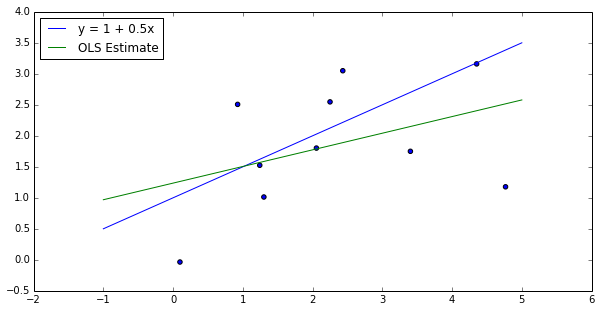

In [76]:
from sklearn import linear_model

lmr = linear_model.LinearRegression()
lmr.fit(pd.DataFrame(x), pd.DataFrame(y))

xTest = pd.DataFrame(np.arange(-1,6))
yHat = lmr.predict(xTest)

f = plt.figure()
plt.scatter(x, y)
p1, = plt.plot(np.arange(-1,6), line1)
p2, = plt.plot(xTest, yHat)
plt.legend([p1, p2], ['y = 1 + 0.5x', 'OLS Estimate'], loc=2)
f.set_size_inches(10,5)
plt.show()

### _**Final Student Task_

Finish programming Linear Regression with Gradient Descent, the direct minimization of Linear Regression, and finally the scikit-learn method.  Plot all results on one plot.  

In [85]:
lmr2 = linear_model.LinearRegression(fit_intercept=True)
lmr2.fit(pd.DataFrame(oldfaithful['waiting']),Y)
lmr2.intercept_

-1.8740159864107384